In [2]:
# Import Dependencies
import pandas as pd
from pathlib import Path

## Cleaning Data

In [3]:
# Create path
housing_csv = Path("../Resources/realtor-data.csv")

In [4]:
# Use pandas to read in housing data
housing_df = pd.read_csv(housing_csv)
housing_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1204061,for_sale,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,NaN,536250.0
1204062,for_sale,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,NaN,550000.0
1204063,for_sale,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,NaN,449900.0
1204064,for_sale,3.0,3.0,4.79,North Greenbush,New York,12198.0,2950.0,NaN,657850.0


In [5]:
# Select columns to keep
housing_df_reduced = housing_df[['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'price']]
housing_df_reduced

,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,65000.0
...,...,...,...,...,...,...,...,...
1204061,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,536250.0
1204062,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,550000.0
1204063,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,449900.0
1204064,3.0,3.0,4.79,North Greenbush,New York,12198.0,2950.0,657850.0


In [6]:
# Drop null values
housing_df_clean = housing_df_reduced.dropna(how='any')
housing_df_clean

,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
5,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,179000.0
...,...,...,...,...,...,...,...,...
1204060,4.0,3.0,0.56,North Greenbush,New York,12198.0,2231.0,581625.0
1204061,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,536250.0
1204062,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,550000.0
1204063,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,449900.0


Because the price of homes are heavily dependent on location, we are chosing to focus on the state of New York.  This will make the relationship between the house features and price more comparable for analysis. 

## More Cleaning

In [7]:
value_NY = 'New York'
filtered_df = housing_df_clean[housing_df_clean['state'] == value_NY]
filtered_df

,bed,bath,acre_lot,city,state,zip_code,house_size,price
30149,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,175000.0
54248,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,425000.0
54258,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,225000.0
54259,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,419000.0
54262,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,365000.0
...,...,...,...,...,...,...,...,...
1204060,4.0,3.0,0.56,North Greenbush,New York,12198.0,2231.0,581625.0
1204061,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,536250.0
1204062,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,550000.0
1204063,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,449900.0


In [8]:
# Find number of unique cities in New York
unique_ny = housing_df_clean['city'].nunique()
unique_ny

2641

In [9]:
# Find value counts of cities in New York
count_ny = filtered_df['city'].value_counts()
count_ny

New York City        10190
Brooklyn             10038
Bronx                 8353
Staten Island         7465
Albany                5375
                     ...  
Olive                    1
North Hudson             1
Cottekill                1
Cold Spring Hrbr         1
Richfield Springs        1
Name: city, Length: 849, dtype: int64

In [10]:
# Save the clean df to csv
filtered_df.to_csv("../Resources/ny_data.csv")

## Even More Cleaning

In [11]:
# Reduce dataframe to homes with less than 5 bedrooms and 5 bathrooms
cleanest_data = filtered_df[(filtered_df['bed'] < 5) & (filtered_df['bath'] < 5)]
cleanest_data

,bed,bath,acre_lot,city,state,zip_code,house_size,price
30149,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,175000.0
54248,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,425000.0
54258,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,225000.0
54259,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,419000.0
54262,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,365000.0
...,...,...,...,...,...,...,...,...
1204060,4.0,3.0,0.56,North Greenbush,New York,12198.0,2231.0,581625.0
1204061,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,536250.0
1204062,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,550000.0
1204063,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,449900.0


In [12]:
# Save the clean df to csv
cleanest_data.to_csv("../Resources/ny_data_cleanest.csv")

## Exploring the cleaned data

In [13]:
# house_size, highest to lowest
price = cleanest_data.sort_values(["price"], ascending=False)
price = price.reset_index(drop=True)
price

,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,4.0,4.0,32.00,Sagaponack,New York,11962.0,3800.0,49500000.0
1,4.0,4.0,32.00,Sagaponack,New York,11962.0,3800.0,49500000.0
2,4.0,4.0,32.00,Sagaponack,New York,11962.0,3800.0,49500000.0
3,4.0,4.0,2.55,Bridgehampton,New York,11932.0,3846.0,47500000.0
4,4.0,4.0,2.55,Bridgehampton,New York,11932.0,3846.0,47500000.0
...,...,...,...,...,...,...,...,...
121315,3.0,1.0,0.38,Schenectady,New York,12304.0,1144.0,8000.0
121316,3.0,1.0,0.38,Schenectady,New York,12304.0,1144.0,8000.0
121317,3.0,3.0,0.69,Gloversville,New York,12078.0,2904.0,1.0
121318,3.0,3.0,0.69,Gloversville,New York,12078.0,2904.0,1.0


In [14]:
# acre_lot, highest to lowest 
acres = cleanest_data.sort_values(["acre_lot"], ascending=False)
acres = acres.reset_index(drop=True)
acres

,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,3.0,2.0,100000.0,Bethlehem,New York,12158.0,1396.0,160000.0
1,2.0,1.0,100000.0,Whitehall,New York,12887.0,1352.0,129000.0
2,3.0,2.0,100000.0,Bethlehem,New York,12158.0,1396.0,160000.0
3,3.0,2.0,100000.0,Bethlehem,New York,12158.0,1396.0,160000.0
4,3.0,2.0,100000.0,Bethlehem,New York,12158.0,1396.0,160000.0
...,...,...,...,...,...,...,...,...
121315,4.0,4.0,0.0,Brooklyn,New York,11233.0,2544.0,2300000.0
121316,3.0,4.0,0.0,Cortlandt Manor,New York,10567.0,3100.0,729000.0
121317,3.0,3.0,0.0,Brooklyn,New York,11236.0,1157.0,739000.0
121318,4.0,4.0,0.0,Brooklyn,New York,11233.0,2544.0,2300000.0


In [15]:
# house_size, highest to lowest 
size = cleanest_data.sort_values(["house_size"], ascending=False)
size = size.reset_index(drop=True)
size

,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,3.0,3.0,9.50,Palenville,New York,12463.0,352836.0,419000.0
1,3.0,3.0,9.50,Palenville,New York,12463.0,352836.0,419000.0
2,3.0,3.0,9.50,Palenville,New York,12463.0,352836.0,419000.0
3,3.0,3.0,9.50,Palenville,New York,12463.0,352836.0,419000.0
4,1.0,1.0,2.80,Port Chester,New York,10573.0,112714.0,69999.0
...,...,...,...,...,...,...,...,...
121315,3.0,4.0,0.03,Staten Island,New York,10304.0,122.0,568888.0
121316,3.0,4.0,0.03,Staten Island,New York,10304.0,122.0,568888.0
121317,3.0,4.0,0.03,Staten Island,New York,10304.0,122.0,568888.0
121318,3.0,4.0,0.03,Staten Island,New York,10304.0,122.0,568888.0


## Scatter plots for NYC Boroughs


In [16]:
import matplotlib.pyplot as plt
import numpy as np

Manhattan

In [17]:
## price and house size: Manhattan
manhattan = cleanest_data[(cleanest_data['zip_code'] > 10001) & (cleanest_data['zip_code'] < 10282) & (cleanest_data['house_size'] < 20000)]
manhattan

,bed,bath,acre_lot,city,state,zip_code,house_size,price
465558,1.0,1.0,0.17,New York City,New York,10023.0,700.0,945000.0
465561,3.0,3.0,0.06,New York City,New York,10024.0,1868.0,4475000.0
465612,1.0,2.0,0.09,New York City,New York,10011.0,4400.0,3895000.0
465702,2.0,2.0,0.03,New York City,New York,10013.0,1143.0,2545000.0
465869,3.0,3.0,0.16,New York City,New York,10011.0,3007.0,4100000.0
...,...,...,...,...,...,...,...,...
1083681,4.0,4.0,0.06,New York City,New York,10024.0,2916.0,6470000.0
1083808,4.0,3.0,0.06,New York,New York,10025.0,2600.0,2995000.0
1084034,2.0,2.0,0.30,New York City,New York,10065.0,1325.0,738000.0
1084076,4.0,4.0,0.11,New York City,New York,10011.0,3447.0,9950000.0


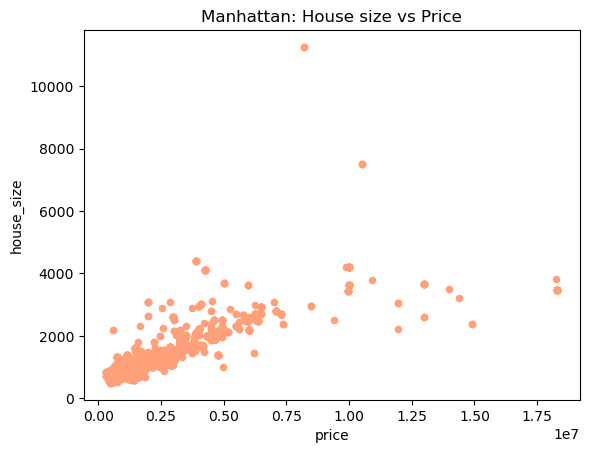

In [18]:
manhattan_plot = manhattan.plot.scatter(x = 'price',
                                            y = 'house_size',
                                            c = 'lightsalmon',
                                            title = "Manhattan: House size vs Price"
                                            )
plt.savefig(f"../Visualizations/manhattan_plot")

Staten Island

In [19]:
## price and house size: Staten Island
staten_island = cleanest_data[(cleanest_data['zip_code'] > 10301) & (cleanest_data['zip_code'] < 10314) & (cleanest_data['price'] < 4000000)]
staten_island

,bed,bath,acre_lot,city,state,zip_code,house_size,price
476455,3.0,3.0,0.03,Staten Island,New York,10310.0,1173.0,175000.0
476457,3.0,1.0,0.06,Staten Island,New York,10305.0,800.0,325000.0
476552,3.0,3.0,0.05,Staten Island,New York,10304.0,1585.0,508000.0
476553,2.0,2.0,0.04,Staten Island,New York,10303.0,840.0,189000.0
476581,3.0,3.0,0.03,Staten Island,New York,10303.0,1677.0,325000.0
...,...,...,...,...,...,...,...,...
1111253,3.0,2.0,0.06,Staten Island,New York,10308.0,1460.0,649900.0
1111254,3.0,4.0,0.02,Staten Island,New York,10308.0,2249.0,699888.0
1111255,3.0,3.0,0.05,Staten Island,New York,10306.0,1512.0,559800.0
1111260,2.0,2.0,0.02,Staten Island,New York,10306.0,1330.0,588000.0


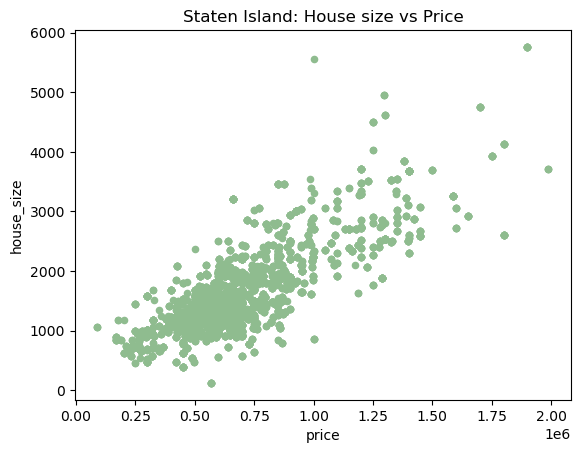

In [20]:
staten_island_plot = staten_island.plot.scatter(x = 'price',
                                            y = 'house_size',
                                            c = 'darkseagreen',
                                            title = "Staten Island: House size vs Price"
                                            )
plt.savefig(f"../Visualizations/staten_island_plot")

Bronx

In [21]:
## price and house size: Bronx
bronx = cleanest_data[(cleanest_data['zip_code'] > 10451) & (cleanest_data['zip_code'] < 10475)]
bronx

,bed,bath,acre_lot,city,state,zip_code,house_size,price
465789,3.0,1.0,0.06,Bronx,New York,10473.0,1260.0,469000.0
465837,4.0,3.0,0.05,Bronx,New York,10460.0,1900.0,725000.0
465878,4.0,2.0,0.06,Bronx,New York,10473.0,1570.0,650000.0
465990,4.0,2.0,0.06,Bronx,New York,10467.0,1800.0,845000.0
466026,3.0,2.0,0.15,Bronx,New York,10463.0,1300.0,1149900.0
...,...,...,...,...,...,...,...,...
1101034,4.0,3.0,0.06,Bronx,New York,10465.0,1600.0,769000.0
1101069,3.0,2.0,0.04,Bronx,New York,10465.0,1998.0,665000.0
1101440,4.0,2.0,0.06,Bronx,New York,10465.0,2244.0,770000.0
1101487,4.0,2.0,0.09,Bronx,New York,10465.0,1986.0,975000.0


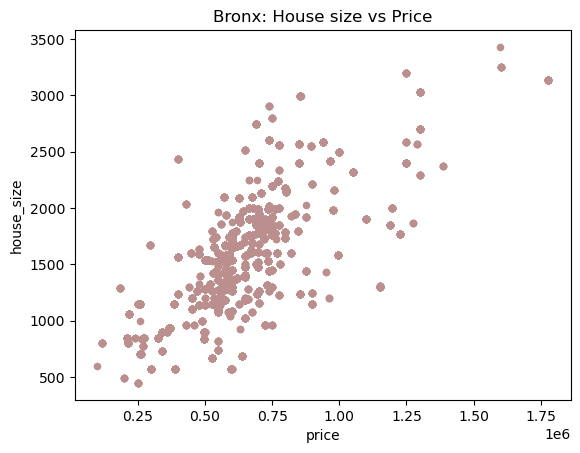

In [22]:
bronx_plot = bronx.plot.scatter(x = 'price',
                                            y = 'house_size',
                                            c = 'rosybrown',
                                            title = "Bronx: House size vs Price"
                                            )
plt.savefig(f"../Visualizations/bronx_plot")

Queens

In [23]:
## price and house size: Queens
queens = cleanest_data[cleanest_data['city'] == 'Queens']
queens

,bed,bath,acre_lot,city,state,zip_code,house_size,price
469278,4.0,3.0,0.06,Queens,New York,11379.0,1848.0,1389999.0
484653,4.0,3.0,0.05,Queens,New York,11436.0,1785.0,669000.0
486519,4.0,3.0,0.06,Queens,New York,11379.0,1848.0,1389999.0
486894,3.0,3.0,0.04,Queens,New York,11433.0,1460.0,700000.0
490294,4.0,3.0,0.05,Queens,New York,11436.0,1785.0,669000.0
...,...,...,...,...,...,...,...,...
1104563,3.0,3.0,0.09,Queens,New York,11413.0,1046.0,749999.0
1104953,4.0,3.0,0.05,Queens,New York,11436.0,1785.0,669000.0
1105065,4.0,2.0,0.09,Queens,New York,11411.0,1906.0,650000.0
1114512,4.0,3.0,0.07,Queens,New York,11412.0,1918.0,749999.0


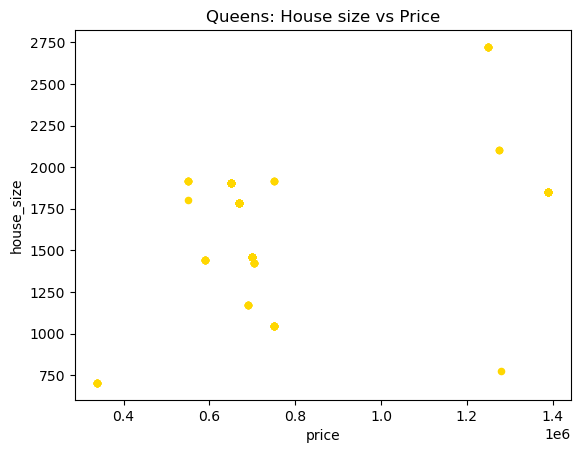

In [24]:
queens_plot = queens.plot.scatter(x = 'price',
                                            y = 'house_size',
                                            c = 'gold',
                                            title = "Queens: House size vs Price"
                                            )
plt.savefig(f"../Visualizations/queens_plot")

Brooklyn

In [25]:
## price and house size: Queens
brooklyn = cleanest_data[cleanest_data['city'] == 'Brooklyn']
brooklyn

,bed,bath,acre_lot,city,state,zip_code,house_size,price
465079,3.0,2.0,20.00,Brooklyn,New York,11225.0,2400.0,1575000.0
465571,2.0,1.0,0.02,Brooklyn,New York,11232.0,672.0,680000.0
465984,3.0,1.0,0.04,Brooklyn,New York,11212.0,1116.0,599000.0
466181,3.0,3.0,0.06,Brooklyn,New York,11207.0,1200.0,394900.0
466332,4.0,2.0,0.05,Brooklyn,New York,11213.0,1452.0,950000.0
...,...,...,...,...,...,...,...,...
1111267,4.0,4.0,0.04,Brooklyn,New York,11229.0,1292.0,998000.0
1111271,3.0,1.0,0.05,Brooklyn,New York,11234.0,1036.0,698000.0
1111278,3.0,3.0,0.04,Brooklyn,New York,11234.0,1092.0,739000.0
1111280,4.0,4.0,0.12,Brooklyn,New York,11234.0,4789.0,2145000.0


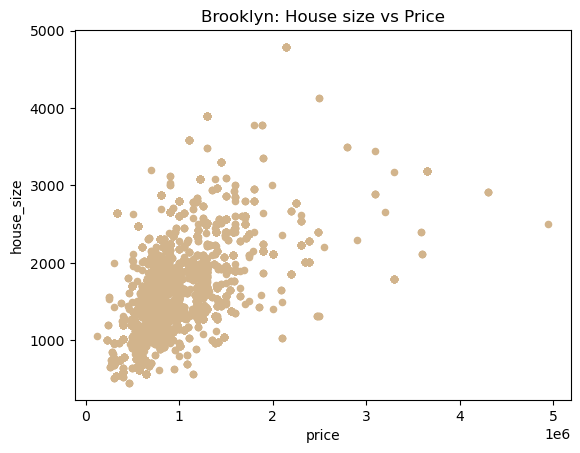

In [26]:
brooklyn_plot = brooklyn.plot.scatter(x = 'price',
                                            y = 'house_size',
                                            c = 'tan',
                                            title = "Brooklyn: House size vs Price"
                                            )
plt.savefig(f"../Visualizations/brooklyn_plot")